# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 13

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [37]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
96,Pope,Burnley,54,11.034483,64,54.014021,5.8,4.895021,6.467036,5.045830,2.106481
597,Sánchez,Brighton,44,2.000000,10,8.831991,5.0,4.415996,6.797316,4.560547,2.105243
12,Martínez,Aston Villa,48,11.090909,61,50.241148,5.5,4.529940,5.065450,4.607771,2.067625
431,Fabianski,West Ham,51,13.043478,60,57.370411,4.6,4.398398,4.005272,4.261391,1.947643
383,Lloris,Tottenham,56,12.978723,61,58.414410,4.7,4.500782,5.767767,4.401708,1.901928
325,Darlow,Newcastle Utd,50,12.051282,47,50.593741,3.9,4.198204,3.081720,4.087433,1.877494
363,McCarthy,Southampton,46,12.926829,53,48.218661,4.1,3.730123,4.403849,3.551794,1.739179
417,Johnstone,West Brom,45,13.055556,47,47.306568,3.6,3.623482,4.033096,3.397373,1.708126
8,Leno,Arsenal,50,12.857143,45,47.565496,3.5,3.699539,3.939723,3.768491,1.654484


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
470,Kilman,Wolves,42,7.021277,33,30.530814,4.7,4.348328,2.846260,4.341319,2.121767
277,Cancelo,Manchester City,55,7.916667,38,37.859045,4.8,4.782195,4.228516,4.657389,2.039135
232,Chilwell,Chelsea,62,10.000000,65,50.248074,6.5,5.024807,5.203698,4.879777,2.018011
273,Stones,Manchester City,48,4.000000,22,17.191852,5.5,4.297963,5.442574,4.223992,1.961743
123,James,Chelsea,53,12.000000,54,53.907413,4.5,4.492284,5.207007,4.358690,1.951324
558,Coufal,West Ham,46,10.000000,44,41.669915,4.4,4.166991,4.386557,3.934087,1.942870
165,Holgate,Everton,48,4.000000,22,16.662306,5.5,4.165576,5.224217,4.295533,1.901317
563,Ait Nouri,Wolves,50,4.000000,20,16.956320,5.0,4.239080,2.696260,4.223084,1.895774
389,Aurier,Tottenham,52,7.000000,35,29.798784,5.0,4.256969,3.487767,4.222074,1.866804


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
105,Jorginho,Chelsea,48,6.981132,37,34.880891,5.3,4.996452,NaN,4.813122,2.280558
141,Zaha,Crystal Palace,75,11.014493,76,64.551594,6.9,5.860605,5.741127,5.871788,2.139990
272,De Bruyne,Manchester City,119,10.909091,60,77.788431,5.5,7.130606,8.945408,6.716096,2.067059
37,Grealish,Aston Villa,78,11.014493,76,62.826011,6.9,5.703940,4.278862,5.591389,2.042338
254,Salah,Liverpool,124,12.000000,102,85.333252,8.5,7.111104,6.749322,7.401766,2.019418
390,Son,Tottenham,96,12.954545,114,80.571180,8.8,6.219530,5.542231,6.395130,2.007345
40,Trézéguet,Aston Villa,53,8.928571,25,39.871319,2.8,4.465588,7.153862,4.373202,1.939727
302,Fernandes,Manchester Utd,110,11.971831,85,76.658357,7.1,6.403227,7.206683,6.580600,1.930646
275,Mahrez,Manchester City,85,8.965517,52,47.732028,5.8,5.323957,6.988379,5.073555,1.826102


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,63,13.064516,81,77.419266,6.2,5.925919,6.035695,6.006252,2.360943
506,Wilson,Newcastle Utd,66,11.060606,73,64.085688,6.6,5.794049,4.698847,5.845956,2.255330
388,Kane,Tottenham,109,12.976190,109,92.104220,8.4,7.097940,4.528174,7.348240,2.149904
224,Vardy,Leicester City,103,12.027027,89,80.352110,7.4,6.680962,5.649414,6.353479,2.081711
514,Watkins,Aston Villa,61,11.063830,52,55.746422,4.7,5.038619,3.550000,4.891130,2.040077
164,Calvert-Lewin,Everton,79,12.941176,88,71.919266,6.8,5.557398,5.456980,5.421917,1.977233
377,Adams,Southampton,60,13.000000,65,61.532110,5.0,4.733239,4.884865,4.774262,1.932337
68,Maupay,Brighton,61,11.052632,42,48.466422,3.8,4.385057,2.725000,4.287906,1.775458
166,Richarlison,Everton,78,10.000000,45,48.352110,4.5,4.835211,4.548174,4.724946,1.731283


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,119,10.909091,60,77.788431,5.5,7.130606,6.716096,2.067059
254,Salah,Liverpool,124,12.000000,102,85.333252,8.5,7.111104,7.401766,2.019418
388,Kane,Tottenham,109,12.976190,109,92.104220,8.4,7.097940,7.348240,2.149904
224,Vardy,Leicester City,103,12.027027,89,80.352110,7.4,6.680962,6.353479,2.081711
302,Fernandes,Manchester Utd,110,11.971831,85,76.658357,7.1,6.403227,6.580600,1.930646
390,Son,Tottenham,96,12.954545,114,80.571180,8.8,6.219530,6.395130,2.007345
202,Bamford,Leeds United,63,13.064516,81,77.419266,6.2,5.925919,6.006252,2.360943
141,Zaha,Crystal Palace,75,11.014493,76,64.551594,6.9,5.860605,5.871788,2.139990
506,Wilson,Newcastle Utd,66,11.060606,73,64.085688,6.6,5.794049,5.845956,2.255330


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
105,Jorginho,Chelsea,48,6.981132,5.3,4.996452,NaN,5.253458,4.813122,2.280558
40,Trézéguet,Aston Villa,53,8.928571,2.8,4.465588,7.153862,5.287206,4.373202,1.939727
557,Lookman,Fulham,50,10.000000,3.8,3.964718,4.212196,4.013023,3.936065,1.773076
203,Harrison,Leeds United,54,12.093023,4.3,4.096584,3.930867,3.858164,4.193740,1.762889
33,Hourihane,Aston Villa,60,4.000000,5.0,4.275074,2.053265,4.861657,4.227318,1.745292
106,Barkley,Aston Villa,59,8.000000,4.0,4.124271,1.000000,4.811988,4.057311,1.697936
449,Soucek,West Ham,50,13.076923,3.9,3.789698,4.511318,3.313797,3.535448,1.694805
469,Podence,Wolves,54,12.045455,4.4,3.932511,4.426184,4.143297,3.828353,1.692283
474,Neto,Wolves,58,13.061224,4.9,4.071870,4.859582,4.280392,3.972920,1.690752


In [36]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,119,10.909091,60,77.788431,5.5,7.130606,8.945408,6.716096,2.067059
134,Ward,Crystal Palace,43,6.000000,15,16.862336,2.5,2.810389,8.181345,2.690003,1.355290
155,Digne,Everton,61,8.095238,34,35.362967,4.2,4.368367,7.225935,4.512378,1.768700
302,Fernandes,Manchester Utd,110,11.971831,85,76.658357,7.1,6.403227,7.206683,6.580600,1.930646
40,Trézéguet,Aston Villa,53,8.928571,25,39.871319,2.8,4.465588,7.153862,4.373202,1.939727
300,Shaw,Manchester Utd,48,7.931034,23,24.203616,2.9,3.051760,7.104777,2.928925,1.392932
275,Mahrez,Manchester City,85,8.965517,52,47.732028,5.8,5.323957,6.988379,5.073555,1.826102
597,Sánchez,Brighton,44,2.000000,10,8.831991,5.0,4.415996,6.797316,4.560547,2.105243
254,Salah,Liverpool,124,12.000000,102,85.333252,8.5,7.111104,6.749322,7.401766,2.019418


In [22]:
metric = 'next1_xP'

display(df[goalkeepers].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
12,Martínez,Aston Villa,48,11.090909,61,50.241148,5.5,4.529940,5.460394,2.067625
96,Pope,Burnley,54,11.034483,64,54.014021,5.8,4.895021,5.459057,2.106481
597,Sánchez,Brighton,44,2.000000,10,8.831991,5.0,4.415996,5.100619,2.105243
325,Darlow,Newcastle Utd,50,12.051282,47,50.593741,3.9,4.198204,4.489534,1.877494
455,Patrício,Wolves,55,12.894737,49,48.655243,3.8,3.773264,4.421282,1.608925
383,Lloris,Tottenham,56,12.978723,61,58.414410,4.7,4.500782,4.397636,1.901928
560,Kelleher,Liverpool,45,1.000000,7,3.971329,7.0,3.971329,4.163702,1.872102
252,Alisson,Liverpool,59,10.000000,37,38.713288,3.7,3.871329,4.063702,1.593801
431,Fabianski,West Ham,51,13.043478,60,57.370411,4.6,4.398398,4.002632,1.947643


In [12]:
metric = 'xG'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
200,Dallas,Leeds United,46,13.055556,3.6,2.888070,2.650127,1.346569,1.7,0.6,2.3,0.176170
62,Dunk,Brighton,48,10.000000,1.7,2.975996,3.781981,1.358350,1.1,0.0,1.1,0.110000
412,Bartley,West Brom,44,8.181818,2.2,2.420692,2.194468,1.154020,1.1,0.0,1.1,0.134444
41,Mings,Aston Villa,53,10.943396,5.3,3.625150,4.729874,1.574665,1.0,0.2,1.2,0.109655
351,Baldock,Sheffield Utd,51,13.333333,1.5,2.997999,2.694827,1.327536,1.0,1.2,2.2,0.165000
298,Maguire,Manchester Utd,54,12.000000,3.0,2.993732,2.868149,1.288297,0.9,0.1,1.0,0.083333
232,Chilwell,Chelsea,62,10.000000,6.5,5.024807,5.179588,2.018011,0.9,1.0,1.9,0.190000
556,Dias,Manchester City,56,10.000000,3.5,3.552963,3.642870,1.501401,0.8,0.0,0.8,0.080000
255,Robertson,Liverpool,72,12.888889,4.5,4.294011,4.376022,1.600284,0.8,2.0,2.8,0.217241


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,form 5,form 10,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
388,10,18,388,100.0,100.0,5,78830,NaN,NaN,0,0,4,-4,279.3,18,1,1.0,NaN,4,4,5.8,5.3,2,Harry,5.8,11,9,145.9,3,1,True,592.8,1,1,1163,NaN,2020-12-02T13:00:19.592396Z,109,0,0,1.0,0,NaN,78830.jpg,8.4,0,0,Kane,42.2,False,...,1.3,1.0,0.5,0.0,0.1,0.0,8.0,0.6,1.0,0.8,1.0,0.2,0.0,2.617904,0.0,0.0,1.2,1.0,0.2,1.0,2.7,0.1,0.0,1.1,1.0,0.1,0.0,7.522968,0.3,1.0,0.9,1.0,0.1,1.0,6.6,0.4,1.0,1.2,0.0,0.0,0.0,4.528174,6.550125,7.163759,7.34824,7.280931,0.651187,2.149904,11.0,0.847706


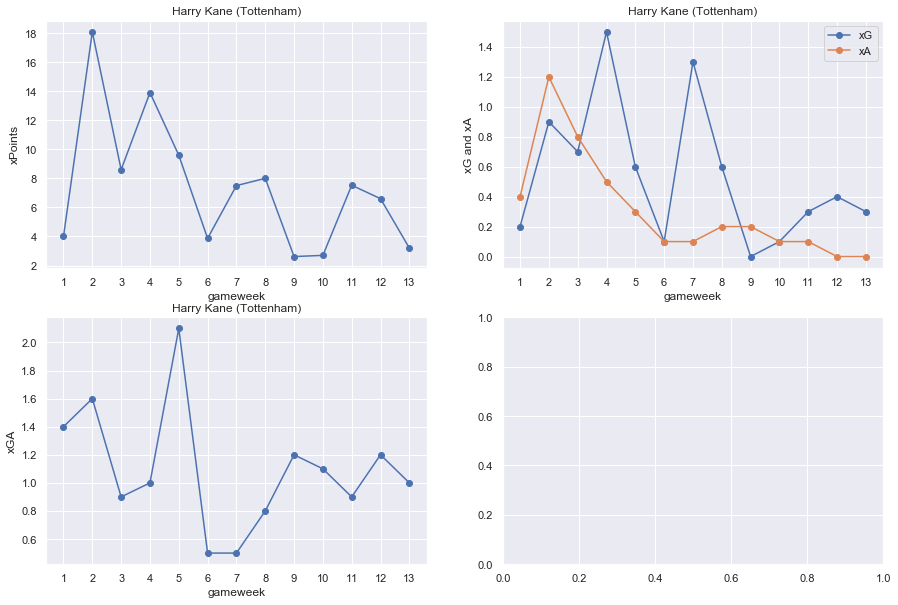

In [35]:
# find player index
name_string = 'Kane'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,form 5,form 10,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,59,100.0,100.0,2,176413,NaN,NaN,0,0,-3,3,37.4,253,146,NaN,NaN,0,3,2.7,2.7,2,Christian,2.2,4,1,28.9,179,89,False,78.2,254,106,339,NaN,2020-12-12T22:00:13.289919Z,82,0,0,NaN,0,NaN,176413.jpg,2.8,0,0,Pulisic,2.5,False,...,NaN,NaN,0.4,0.0,NaN,NaN,NaN,NaN,NaN,0.6,0.0,NaN,NaN,NaN,NaN,NaN,0.7,0.0,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,5.772532,0.7,1.0,1.3,1.0,0.0,0.0,NaN,NaN,NaN,1.3,0.0,NaN,NaN,3.326354,2.814408,3.015784,2.823844,2.89397,0.354535,1.015235,1.2,0.197647


In [30]:
my_starting11 = [12,232,77,277,254,302,37,141,506,202,388]
my_subs = [35,474,200,146]

In [31]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,48,11.090909,5.5,4.529940,5.065450,4.299147,5.460394,4.607771,2.067625
232,Chilwell,Chelsea,62,10.000000,6.5,5.024807,5.203698,5.723578,5.179588,4.879777,2.018011
77,Lamptey,Brighton,48,10.937500,3.2,3.420043,2.207107,3.313486,4.220670,3.536900,1.561029
277,Cancelo,Manchester City,55,7.916667,4.8,4.782195,4.228516,5.305937,4.843303,4.657389,2.039135
254,Salah,Liverpool,124,12.000000,8.5,7.111104,6.749322,6.931712,6.671876,7.401766,2.019418
302,Fernandes,Manchester Utd,110,11.971831,7.1,6.403227,7.206683,6.791672,7.679827,6.580600,1.930646
37,Grealish,Aston Villa,78,11.014493,6.9,5.703940,4.278862,6.334449,6.631755,5.591389,2.042338
141,Zaha,Crystal Palace,75,11.014493,6.9,5.860605,5.741127,6.303121,6.098052,5.871788,2.139990
506,Wilson,Newcastle Utd,66,11.060606,6.6,5.794049,4.698847,6.070736,6.426850,5.845956,2.255330



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
474,Neto,Wolves,58,13.061224,4.9,4.071870,4.859582,4.425554,4.280392,3.972920,1.690752
200,Dallas,Leeds United,46,13.055556,3.6,2.888070,3.894283,3.374190,2.650127,3.143609,1.346569
146,Mitchell,Crystal Palace,40,6.000000,2.5,2.760389,NaN,2.062231,2.270301,2.639159,1.380195


## Save data

In [38]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)